In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='count'>

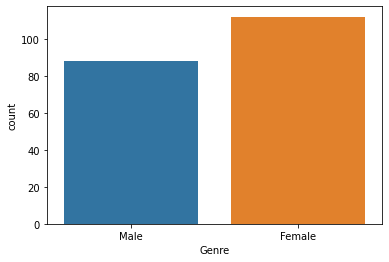

In [5]:
sns.countplot(df['Genre'])

In [6]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [7]:
df['Genre'].value_counts()/len(df)*100

Female    56.0
Male      44.0
Name: Genre, dtype: float64

In [8]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [23]:
model = KMeans(n_clusters=5)
model.fit(x)

KMeans(n_clusters=5)

In [24]:
model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [25]:
df['Cluster'] = model.labels_

In [26]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [27]:
df['Cluster'].value_counts()

1    79
2    39
0    36
4    23
3    23
Name: Cluster, dtype: int64

In [28]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
# x_scaled

In [29]:
df_x_scaled = pd.DataFrame(x_scaled,columns = x.columns)
df_x_scaled

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


In [30]:
model = KMeans(n_clusters=5)
model.fit(df_x_scaled)

KMeans(n_clusters=5)

In [31]:
df['Clsuter_scale'] = model.labels_

In [32]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Clsuter_scale
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,3,2
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,3,2
4,5,Female,31,17,40,4,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0
196,197,Female,45,126,28,0,1
197,198,Male,32,126,74,2,0
198,199,Male,32,137,18,0,1


In [33]:
df['Clsuter_scale'].value_counts()

3    58
4    49
0    40
1    30
2    23
Name: Clsuter_scale, dtype: int64

In [34]:
model.inertia_

10.303964892534122

In [35]:
wcss =[]

for k in range(3,15):
    model = KMeans(n_clusters=k)
    model.fit(df_x_scaled)
    
    wcss.append(model.inertia_)
    

In [36]:
wcss

[17.370109472896697,
 12.650287676229912,
 10.303964892534122,
 8.385099035848988,
 7.183881799127918,
 6.252423165878955,
 5.4900153838727945,
 5.000868360712567,
 4.545703387575716,
 4.264652775432523,
 4.1136095844563965,
 3.75582445720526]

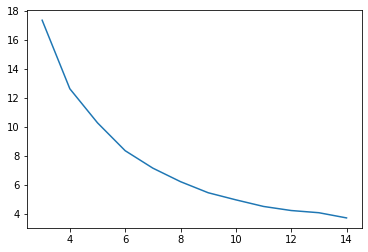

In [37]:
plt.plot(range(3,15),wcss)

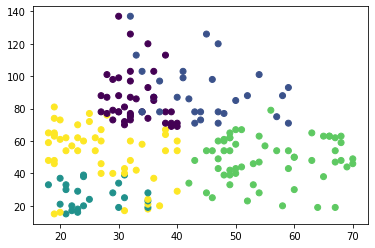

In [38]:
plt.scatter(x=df['Age'],y=df['Annual Income (k$)'], c = df['Clsuter_scale'])
# df.columns

In [39]:
model = KMeans(n_clusters=10)
model.fit(df_x_scaled)

KMeans(n_clusters=10)

In [40]:
df['Clsuter_10'] = model.labels_

In [41]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Clsuter_scale,Clsuter_10
0,1,Male,19,15,39,4,4,0
1,2,Male,21,15,81,3,2,9
2,3,Female,20,16,6,4,4,3
3,4,Female,23,16,77,3,2,9
4,5,Female,31,17,40,4,4,3
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0,4
196,197,Female,45,126,28,0,1,2
197,198,Male,32,126,74,2,0,4
198,199,Male,32,137,18,0,1,5


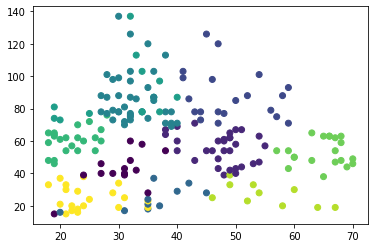

In [42]:
plt.scatter(x=df['Age'],y=df['Annual Income (k$)'], c = df['Clsuter_10'])
# df.columns

In [43]:
df_x_scaled.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [44]:
def user_input():
    age = int(input("age"))
    annual_income = int(input("annual income"))
    speding_score = int(input("spending score"))
    
    user_data = np.zeros(3)
    
    user_data[0] = age
    user_data[1] = annual_income
    user_data[2] = speding_score
    
    user_data_scale = scaler.transform([user_data])
    
    res = model.predict(user_data_scale)
    print(res)
    
user_input()   

age 23
annual income 30
spending score 21


[3]


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [49]:
import pickle

In [50]:
with open('model.pkl','wb') as file:
    pickle.dump(model, file)

In [51]:
with open('scaler.pkl','wb') as file1:
    pickle.dump(scaler, file1)